In [1]:
# Extract from https://github.com/StanfordVL/behavior/blob/main/behavior/benchmark/behavior_benchmark.py
import os
import numpy as np

from PIL import Image
from igibson.utils.utils import parse_config

from igibson import object_states
from igibson.utils.utils import restoreState

from igibson.action_primitives.fetch_robot_semantic_actions_env import FetchRobotSemanticActionEnv
from igibson.custom_utils import get_env_config, print_properties
from igibson.primitives_utils import get_names_of_visible_obj_inside, get_objects_inside, settle_physics
import igibson.render_utils as render_utils

import warnings
warnings.filterwarnings("ignore")


 _   _____  _  _
(_) / ____|(_)| |
 _ | |  __  _ | |__   ___   ___   _ __
| || | |_ || || '_ \ / __| / _ \ | '_ \
| || |__| || || |_) |\__ \| (_) || | | |
|_| \_____||_||_.__/ |___/ \___/ |_| |_|



/miniconda/envs/igibson/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Env config
task = "cleaning_out_drawers"
scene_id =  "Benevolence_1_int"

# Init env
sim_env = FetchRobotSemanticActionEnv(task, scene_id, verbose=False)

Rendering settings is None - going with the default settings!


In [4]:
def print_symbolic_state(state):
    print("-"*76)
    print("Symbolic state: \n")
    for k in state:
        true_states = {}
        for key in state[k].keys():
            val = state[k][key] # bool
            if val: 
                true_states[key] = val
                
        print(k, true_states)
    print("-"*76)

def execute_plan(sim_env, plan):
    image, symbolic_state = sim_env.get_state_and_image()

    image.show()
    print_symbolic_state(symbolic_state)
    
    for action in plan:
        try:
            success, image, symbolic_state = sim_env.apply_action(action)
            print(f'Action {action} executed. Success: {success}')

            image.show()
            print_symbolic_state(symbolic_state)
            
            legal = True
            
        except (ValueError, AssertionError) as e:
            print(f"Action {action} failed: {e}")
            success = False
            legal = False

In [5]:
plan = [
    {'action':'navigate-to', 'params':['cabinet_1']},
    {'action':'open-container', 'params':['cabinet_1']}, # this should trigger double bboxes on the 2 bowls
]

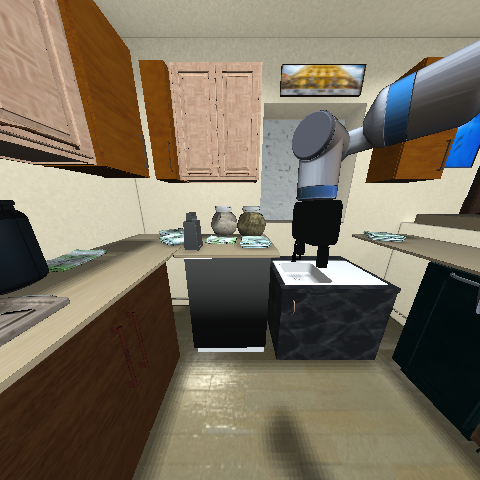

----------------------------------------------------------------------------
Symbolic state: 

reachable {'sink.n.01_1': True}
holding {}
is_movable {'bowl.n.01_1': True, 'bowl.n.01_2': True, 'spoon.n.01_1': True, 'spoon.n.01_2': True, 'piece_of_cloth.n.01_1': True}
open {}
ontop {'spoon.n.01_1,cabinet.n.01_2': True, 'spoon.n.01_2,cabinet.n.01_2': True}
inside {'bowl.n.01_1,cabinet.n.01_1': True, 'bowl.n.01_2,cabinet.n.01_1': True, 'spoon.n.01_1,cabinet.n.01_2': True, 'spoon.n.01_2,cabinet.n.01_2': True, 'piece_of_cloth.n.01_1,cabinet.n.01_1': True}
nextto {'bowl.n.01_1,bowl.n.01_2': True, 'bowl.n.01_1,cabinet.n.01_1': True, 'bowl.n.01_2,bowl.n.01_1': True, 'bowl.n.01_2,cabinet.n.01_1': True, 'spoon.n.01_1,cabinet.n.01_2': True, 'spoon.n.01_2,cabinet.n.01_2': True, 'piece_of_cloth.n.01_1,cabinet.n.01_1': True}
----------------------------------------------------------------------------
Action {'action': 'navigate-to', 'params': ['cabinet_1']} executed. Success: True


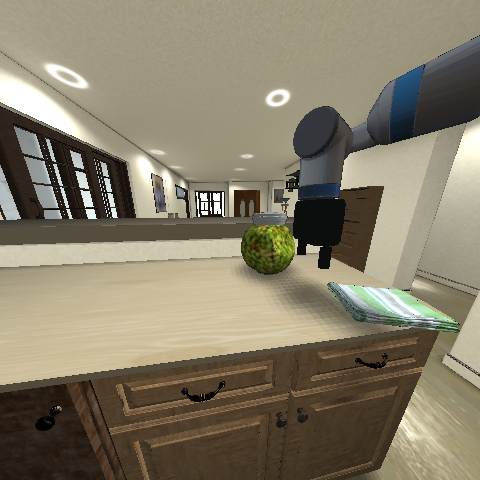

----------------------------------------------------------------------------
Symbolic state: 

reachable {'cabinet.n.01_1': True}
holding {}
is_movable {'bowl.n.01_1': True, 'bowl.n.01_2': True, 'spoon.n.01_1': True, 'spoon.n.01_2': True, 'piece_of_cloth.n.01_1': True}
open {}
ontop {'spoon.n.01_1,cabinet.n.01_2': True, 'spoon.n.01_2,cabinet.n.01_2': True}
inside {'bowl.n.01_1,cabinet.n.01_1': True, 'bowl.n.01_2,cabinet.n.01_1': True, 'spoon.n.01_1,cabinet.n.01_2': True, 'spoon.n.01_2,cabinet.n.01_2': True, 'piece_of_cloth.n.01_1,cabinet.n.01_1': True}
nextto {'bowl.n.01_1,bowl.n.01_2': True, 'bowl.n.01_1,cabinet.n.01_1': True, 'bowl.n.01_2,bowl.n.01_1': True, 'bowl.n.01_2,cabinet.n.01_1': True, 'spoon.n.01_1,cabinet.n.01_2': True, 'spoon.n.01_2,cabinet.n.01_2': True, 'piece_of_cloth.n.01_1,cabinet.n.01_1': True}
----------------------------------------------------------------------------
Action {'action': 'open-container', 'params': ['cabinet_1']} executed. Success: True


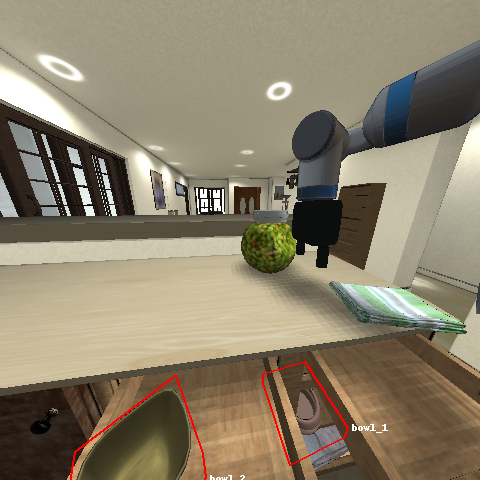

----------------------------------------------------------------------------
Symbolic state: 

reachable {'bowl.n.01_1': True, 'bowl.n.01_2': True, 'piece_of_cloth.n.01_1': True}
holding {}
is_movable {'bowl.n.01_1': True, 'bowl.n.01_2': True, 'spoon.n.01_1': True, 'spoon.n.01_2': True, 'piece_of_cloth.n.01_1': True}
open {'cabinet.n.01_1': True}
ontop {'bowl.n.01_2,cabinet.n.01_1': True, 'spoon.n.01_1,cabinet.n.01_2': True, 'spoon.n.01_2,cabinet.n.01_2': True}
inside {'bowl.n.01_1,cabinet.n.01_1': True, 'bowl.n.01_2,cabinet.n.01_1': True, 'spoon.n.01_1,cabinet.n.01_2': True, 'spoon.n.01_2,cabinet.n.01_2': True, 'piece_of_cloth.n.01_1,cabinet.n.01_1': True}
nextto {'bowl.n.01_1,cabinet.n.01_1': True, 'bowl.n.01_2,cabinet.n.01_1': True, 'spoon.n.01_1,cabinet.n.01_2': True, 'spoon.n.01_2,cabinet.n.01_2': True, 'piece_of_cloth.n.01_1,cabinet.n.01_1': True}
----------------------------------------------------------------------------


In [6]:
image, symbolic_state = sim_env.get_state_and_image()

image.show()
print_symbolic_state(symbolic_state)

for action in plan:
    try:
        success, image, symbolic_state = sim_env.apply_action(action)
        print(f'Action {action} executed. Success: {success}')

        image.show()
        print_symbolic_state(symbolic_state)
        
        legal = True
        
    except (ValueError, AssertionError) as e:
        print(f"Action {action} failed: {e}")
        success = False
        legal = False